In [2]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import eig

In [3]:
faces = {}
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

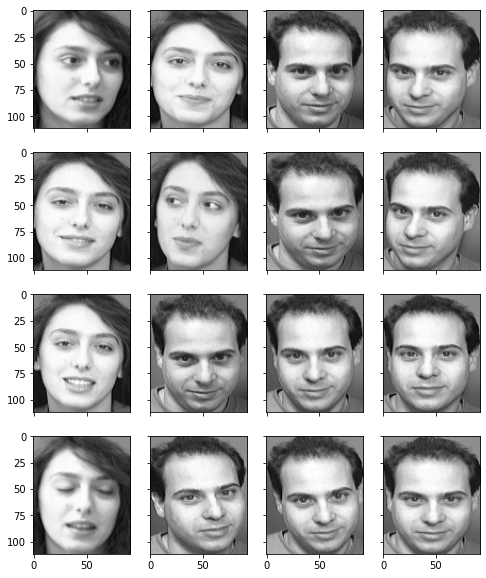

In [4]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [5]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (112, 92)


In [6]:
print(list(faces.keys())[:5])

['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']


In [7]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


In [8]:
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
 
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

In [9]:
pca = PCA().fit(facematrix)

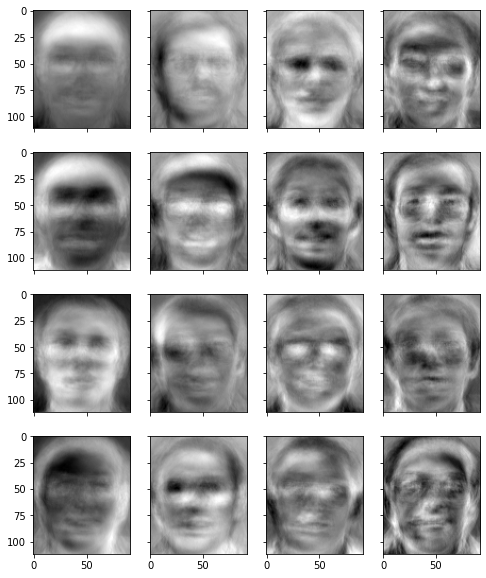

In [10]:
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

In [31]:
pca.components_

array([[-0.0031385 , -0.00311511, -0.00314579, ..., -0.00669021,
        -0.00603985, -0.0070422 ],
       [-0.01397458, -0.01391675, -0.01393117, ...,  0.01147549,
         0.0105211 ,  0.00969744],
       [-0.01949678, -0.01966094, -0.01940504, ..., -0.01571058,
        -0.01589665, -0.01636496],
       ...,
       [-0.00544915, -0.00102731,  0.00406641, ..., -0.00261594,
         0.00191193, -0.01942036],
       [ 0.00256529, -0.00251622,  0.00068547, ...,  0.01091075,
         0.01200536,  0.01137104],
       [-0.014166  ,  0.00790648, -0.00401487, ...,  0.00502697,
         0.00450053,  0.00018719]])

In [20]:
w,v = eig(np.cov(facematrix))

In [28]:
np.matmul(facematrix.T, v).T

array([[ 1.58347098e+03,  1.58327319e+03,  1.58994330e+03, ...,
         1.31764159e+03,  1.30324176e+03,  1.28824969e+03],
       [-3.37494790e+02, -3.36006335e+02, -3.36860418e+02, ...,
        -2.80967707e+00, -1.04363313e+00, -4.15512818e+01],
       [-4.00788904e+02, -4.02499940e+02, -4.00417031e+02, ...,
         1.48979606e+02,  1.14544505e+02,  1.06739881e+02],
       ...,
       [ 5.71318765e+00, -3.30749987e+00, -1.37900757e-01, ...,
         1.18779756e+01,  2.39535101e+01,  1.55392169e+01],
       [-4.40837082e+01, -3.92486486e+01, -4.28039330e+01, ...,
        -2.64100094e+01, -2.56938846e+01, -1.36287919e+01],
       [-1.51801473e+01, -1.36671983e+01, -1.62796058e+01, ...,
         6.20135775e+00, -2.42456200e+01, -3.27950858e+01]])

In [22]:
v.shape

(389, 389)

In [16]:
np.cov(facematrix).shape

(389, 389)

(50, 10304)

In [30]:
pca.components_

array([[-0.0031385 , -0.00311511, -0.00314579, ..., -0.00669021,
        -0.00603985, -0.0070422 ],
       [-0.01397458, -0.01391675, -0.01393117, ...,  0.01147549,
         0.0105211 ,  0.00969744],
       [-0.01949678, -0.01966094, -0.01940504, ..., -0.01571058,
        -0.01589665, -0.01636496],
       ...,
       [-0.00544915, -0.00102731,  0.00406641, ..., -0.00261594,
         0.00191193, -0.01942036],
       [ 0.00256529, -0.00251622,  0.00068547, ...,  0.01091075,
         0.01200536,  0.01137104],
       [-0.014166  ,  0.00790648, -0.00401487, ...,  0.00502697,
         0.00450053,  0.00018719]])